# **Project 2:  Predicting House Prices with Linear Regression**

### **Steps to be followed:**
#### Data Collection 
#### Data Exploration and Cleaning
#### Feature Selection
#### Model Training
#### Model Evaluation
#### Visualization

## **Importing the required libraries**

In [33]:
# Supress Warnings

#import warnings
#warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

## **Data collection**

In [34]:
housing = pd.DataFrame(pd.read_csv("../input/Housing.csv"))
print("Data has been successfully imported")
# Check the head of the dataset
housing.head()

Data has been successfully imported


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## **Data Exploration and Cleaning**

In [35]:
# Shape of our data
print("Rows and Columns of the dataset :- ",housing.shape)

Rows and Columns of the dataset :-  (545, 13)


In [36]:
# Identifying information about composition and potential data quality
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [37]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [38]:
# To show statistical summary of the columns of our data
housing.describe(include ='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [39]:
# To count the null values
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

- ### **There is no null values.So,We can proceed with further data analysis, visualization, and modeling.**

In [40]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


- We can see that our dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [41]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


- The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well.

- For this, we will use something called `dummy variables`.

In [42]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])
status = status.drop('furnished', axis=1)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


Now, we don't need three columns. We can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will be `furnished`
- `01` will be`unfurnished`
- `10` will be `semi-furnished`

In [43]:
# Add the results to the original housing dataframe

housing1 = pd.concat([housing, status], axis = 1)
housing1.drop(['furnishingstatus'], axis = 1, inplace = True)
housing1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## **Splitting the Data into Training and Testing Sets**

In [44]:
# Import train-test-split from sklearn.modelselection
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [45]:
# Display the first few rows of the training subset
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


## **Scaling Training data**

As we know in Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
scaler.fit(df_train[num_vars])
df_train[num_vars] = scaler.transform(df_train[num_vars])
df_train.head()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


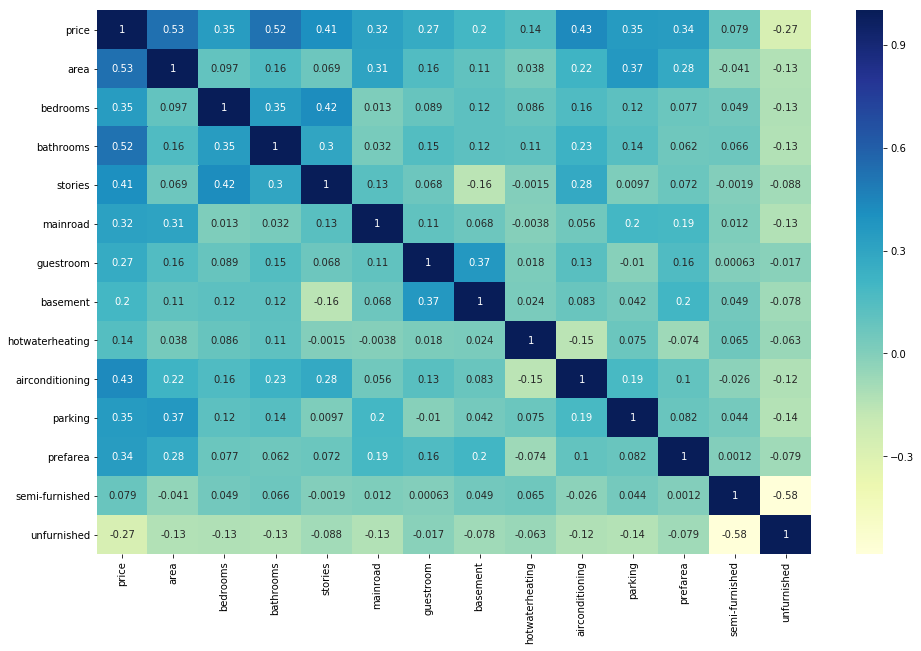

In [47]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### We can notice that `area` seems to the correlated to `price` the most. Let's see a pairplot for `area` vs `price`.

### Dividing into X and Y sets for the model building

In [48]:
# Separate the target variable from the training subset
y_train = df_train.pop('price')

# Extract the remaining features as the training data
X_train = df_train

## Model Training

- ### we will be using the **LinearRegression function from SciKit Learn** and RFE

In [49]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Creating an instance of LinearRegression
lm = LinearRegression()

# Fitting the Linear Regression model to the training data
lm.fit(X_train, y_train)

y_train_price = lm.predict(X_train)

In [50]:
# Retrieve the coefficients of the Linear Regression model
coefficients = lm.coef_

# Print the coefficients
print(coefficients)

[ 0.23466354  0.04673453  0.19082319  0.10851563  0.05044144  0.03042826
  0.02159488  0.08486327  0.06688093  0.06073533  0.05942788  0.00092052
 -0.03100561]


In [52]:
# Calculate the coefficient of determination (R²) for the Linear Regression model on the training data
score = lm.score(X_train, y_train)

# Print the coefficient of determination (R²)
print(score)

0.6814893088451202


## Model Evaluation

### Applying the scaling on the test sets: MinMax Scaler

In [ ]:
# List of columns to scale
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

# Scaling the specified columns in the testing subset using the MinMaxScaler
df_test[num_vars] = scaler.transform(df_test[num_vars])


### Testing our Model

In [53]:
# Separate the target variable from the testing subset
y_test = df_test.pop('price')

# Extract the remaining features as the testing data
X_test = df_test

In [54]:
# Make predictions on the testing data using the trained Linear Regression model
y_pred = lm.predict(X_test)

In [55]:
 # Importing the r2_score function from the sklearn.metrics module
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

-5.840052655149859

In [56]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning','parking','price']
X_test['price'] = y_pred
X_test[num_vars] = scaler.inverse_transform(X_test[num_vars])
X_test

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,price
265,32730156.0,3,3.0,11.0,1,0,0,0,1.0,0.0,1,1,0,7.815439e+09
54,68185836.0,3,5.0,11.0,1,1,0,0,4.0,3.0,0,1,0,1.627512e+10
171,116698752.0,3,3.0,6.0,1,0,0,0,1.0,3.0,1,1,0,2.784177e+10
244,60458316.0,3,3.0,11.0,1,1,1,0,1.0,0.0,1,1,0,1.442933e+10
268,56253636.0,4,3.0,11.0,1,0,0,0,4.0,0.0,0,1,0,1.342652e+10
231,49094316.0,3,3.0,6.0,1,0,0,0,1.0,0.0,1,1,0,1.171711e+10
25,74322396.0,4,5.0,11.0,1,1,1,0,4.0,6.0,1,0,0,1.774088e+10
169,74322396.0,4,5.0,11.0,0,0,0,0,4.0,0.0,0,1,0,1.773762e+10
494,77277036.0,2,3.0,6.0,1,0,0,0,1.0,0.0,0,0,1,1.843722e+10
120,74322396.0,3,3.0,6.0,1,1,1,0,1.0,6.0,1,0,0,1.773611e+10


## **Comparing the actual and predicted values**

In [57]:
# Get the shape of y_test
y_test.shape

# Reshape y_test to a matrix with a single column
y_test_matrix = y_test.values.reshape(-1, 1)

In [59]:
# Creating a DataFrame with actual and predicted values
data_frame = pd.DataFrame({'actual': y_test_matrix.flatten(), 'predicted': y_pred.flatten()})

In [60]:
# Display the first 10 rows of the DataFrame
data_frame.head(10)

,actual,predicted
0,4403000,676.509877
1,7350000,1408.949562
2,5250000,2410.390996
3,4550000,1249.140938
4,4382000,1162.317593
5,4690000,1014.316859
6,8540000,1535.855446
7,5250000,1535.573004
8,2730000,1596.144351
9,5950000,1535.442492


# **Visualization**

Text(0,0.5,'Predicted')

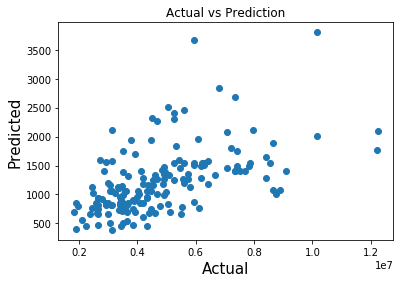

In [62]:
# Create a new figure
fig = plt.figure()

# Scatter plot of actual versus predicted values
plt.scatter(y_test, y_pred)

# Set the title and labels for the plot
plt.title('Actual vs Prediction')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)